In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime
from scipy import stats
from statsmodels.formula.api import ols
import seaborn
import sklearn
from sklearn.decomposition import RandomizedPCA, PCA, SparsePCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy import linalg as LA
from sklearn.manifold import TSNE
import time


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [8]:
m = pd.read_csv('roboBohr.csv')

In [9]:
m.isnull().sum().sum()

0

In [10]:

m.drop('pubchem_id', axis = 1)
X = m.drop(['Eat', 'pubchem_id'],axis=1).values
#X = X[:,1:]
#X = np.divide(X-X.mean(axis=0), np.std(X,axis=0))
X = StandardScaler().fit_transform(X)

sigma = 0.01
mu = 0
Xrand = X * (1 - (sigma * np.random.randn(X.shape[0], X.shape[1]) + mu))
sigma = 0.1
mu = 0
Xrand2 = X * (1 - (sigma * np.random.randn(X.shape[0], X.shape[1]) + mu))
Y = m['Eat']
Id = m['pubchem_id']

In [11]:
X.shape
X[0]

array([-1.73243415, -0.37279531, -0.53444827, ..., -0.0657911 ,
       -0.04901331, -0.0490608 ])

In [12]:
pca = PCA()
pca.fit(X)
pca_score = pca.explained_variance_ratio_
V = pca.components_

In [13]:
pcarand = pca.fit(Xrand)
pcarand_score = pcarand.explained_variance_ratio_



In [14]:
pcarand2 = pca.fit(Xrand2)
pcarand2_score = pcarand2.explained_variance_ratio_

<IPython.core.display.Javascript object>


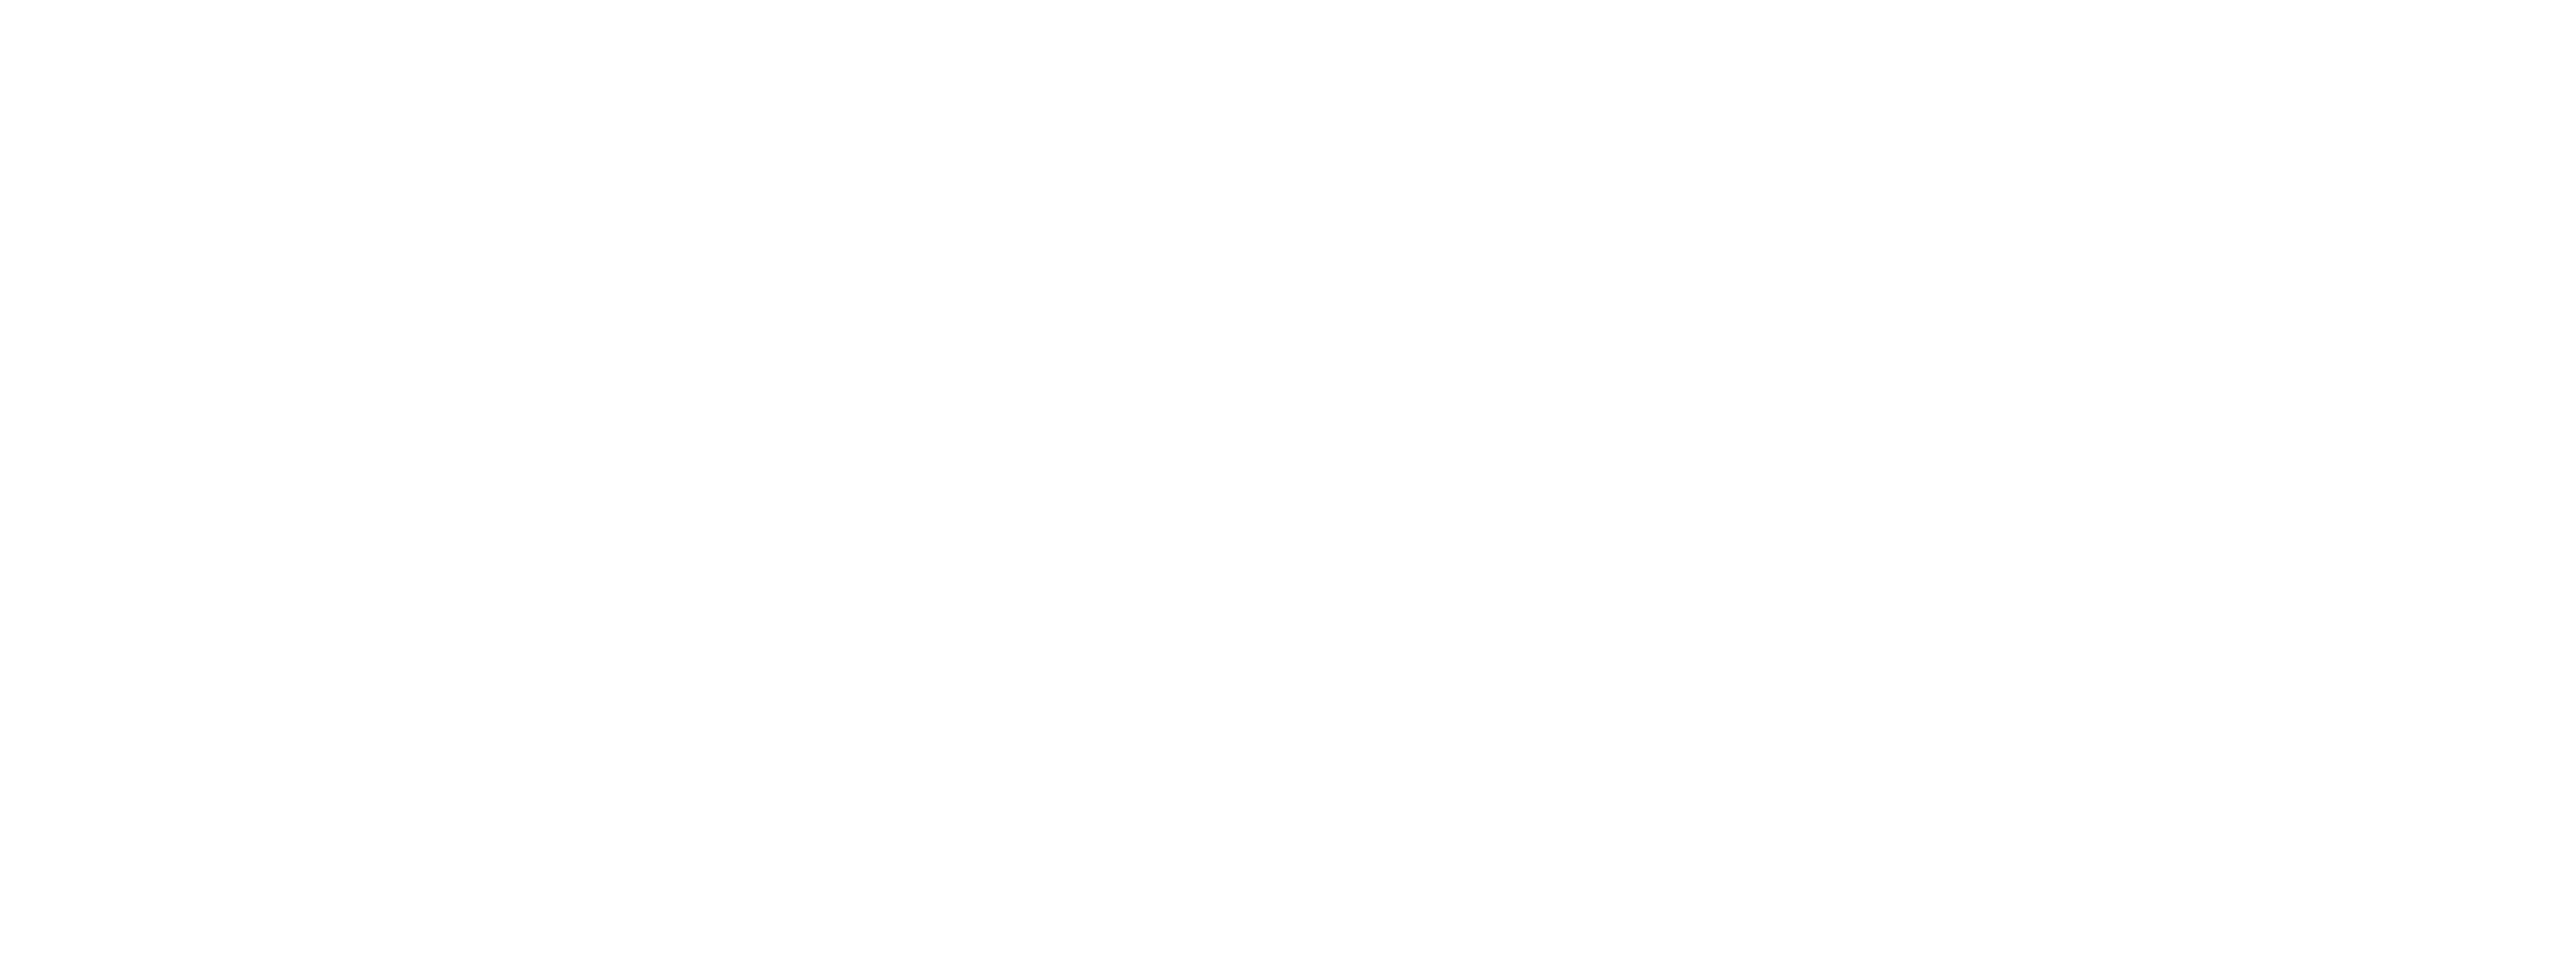

In [15]:
%matplotlib notebook
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(111)
ax1.set_yscale('log')
ax1.set_ylim([1e-9,1])

lin1 = ax1.scatter(range(0, int(pca_score.shape[0])), pca_score, c = 'b', label = 'no random noise')
lin2 = ax1.scatter(range(0, int(pcarand_score.shape[0])), pcarand_score, c = 'r',  label = 'random noise standard deviation = 0.01')
lin3 = ax1.scatter(range(0, int(pcarand2_score.shape[0])), pcarand2_score, c = 'g',  label = 'random noise standard deviation = 0.1')

lines = [lin1, lin2, lin3]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels)
plt.show()

In [16]:
pca2c = PCA(n_components=2)
pca2c.fit(X)
pca2c_score = pca2c.explained_variance_ratio_
V2c = pca.components_


In [17]:
Xt = pca.fit_transform(X)

In [18]:
Xt.shape

(16242, 1276)

In [19]:
cov = np.cov(X, rowvar = False)
evals , evecs = LA.eigh(cov)

In [20]:
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]



In [21]:
Xt2 = np.dot(X, evecs)
Xt2.shape

(16242, 1276)

<IPython.core.display.Javascript object>


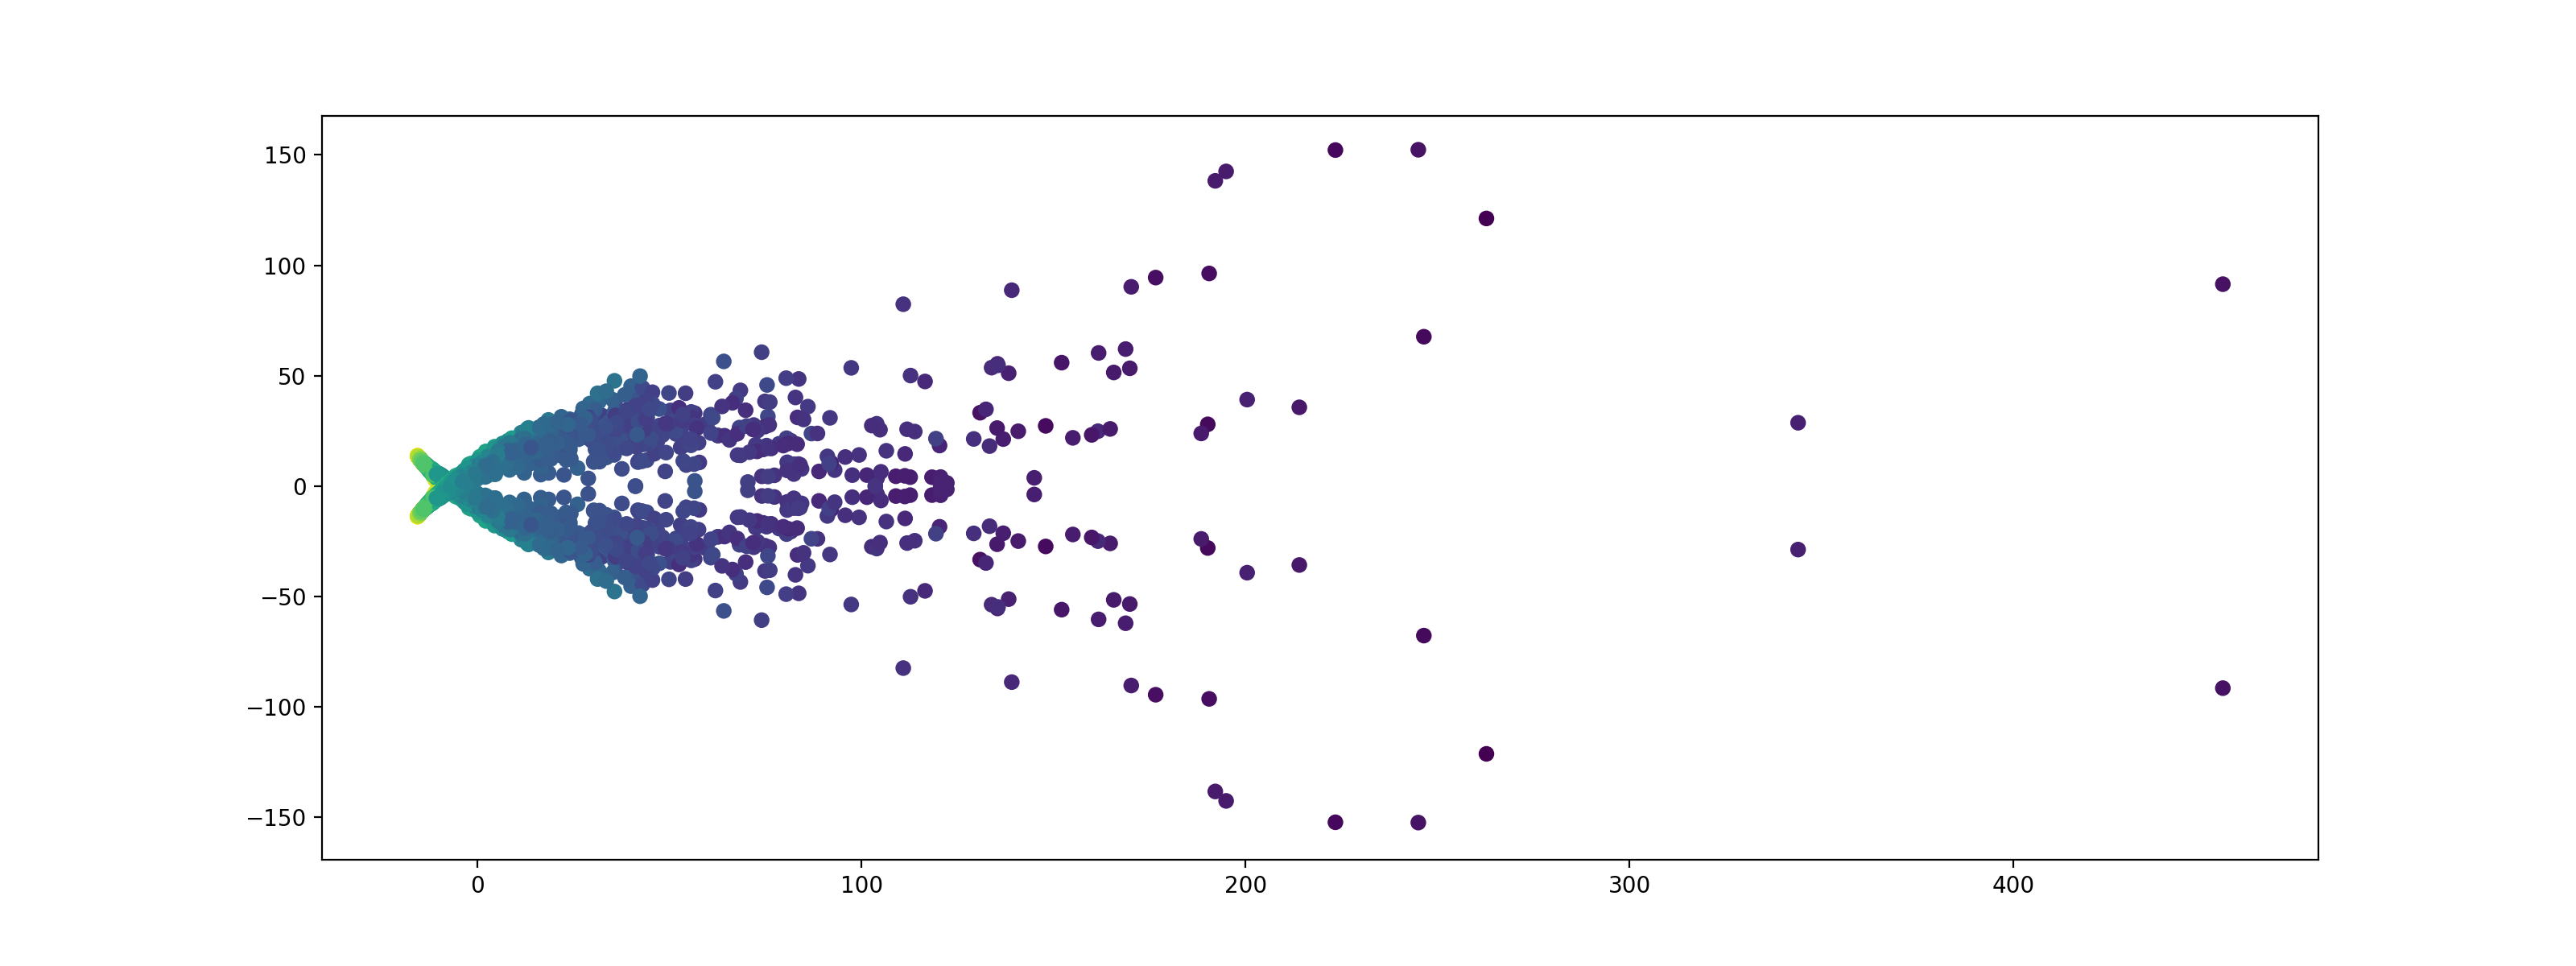

In [34]:
fig = plt.figure(figsize=(16, 6))
ax2 = fig.add_subplot(111)
ax2.scatter(Xt[::4,0], Xt[::4, 1], c=Y[::4])
ax2.scatter(Xt2[::4,0], Xt2[::4, 1], c=Y[::4])
plt.show()

In [23]:
V.shape

(1276, 1276)

In [24]:
X

array([[-1.73243415, -0.37279531, -0.53444827, ..., -0.0657911 ,
        -0.04901331, -0.0490608 ],
       [-1.7322213 , -0.37279531, -0.20747556, ..., -0.0657911 ,
        -0.04901331, -0.0490608 ],
       [-1.73200844, -0.37279531, -0.53299179, ..., -0.0657911 ,
        -0.04901331, -0.0490608 ],
       ..., 
       [ 1.73071352, -0.55087724, -0.18765059, ..., -0.0657911 ,
        -0.04901331, -0.0490608 ],
       [ 1.73092637, -0.55087724, -0.77811709, ..., -0.0657911 ,
        -0.04901331, -0.0490608 ],
       [ 1.73113923, -0.55087724, -0.77800244, ..., -0.0657911 ,
        -0.04901331, -0.0490608 ]])

In [25]:
TSNE1 = TSNE(n_components=2, random_state = 1)
X_embedded = TSNE1.fit_transform(X)
kl = TSNE1.kl_divergence_
X_embedded.shape
kl

0.9240097999572754

In [26]:
TSNE2 = TSNE(n_components=2, random_state = 2)
X_embedded = TSNE2.fit_transform(X)
kl = TSNE2.kl_divergence_
X_embedded.shape
kl

0.9145646095275879

<IPython.core.display.Javascript object>


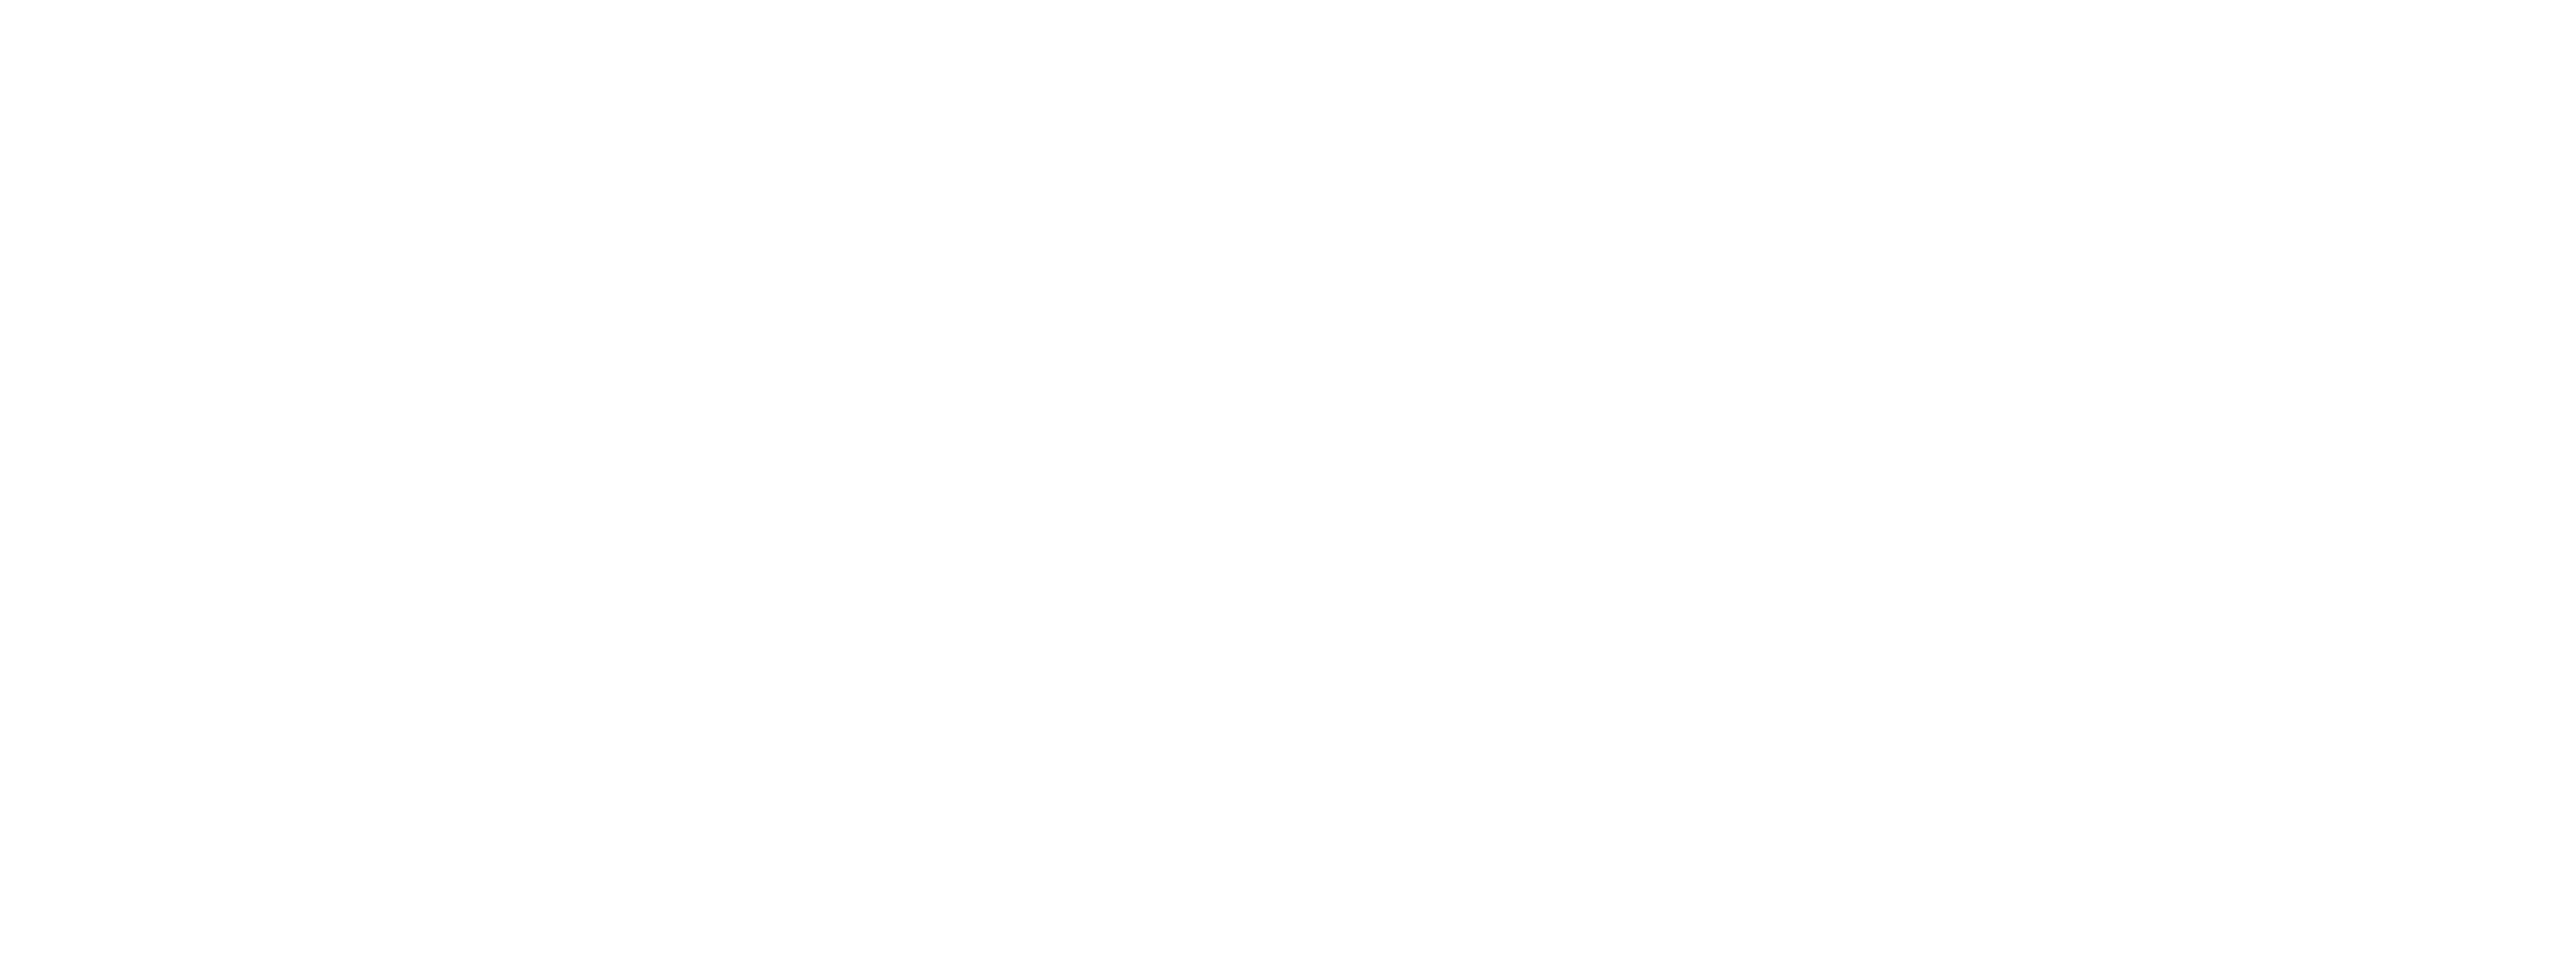

In [27]:
fig = plt.figure(figsize=(16, 6))
ax2 = fig.add_subplot(111)
ax2.scatter(X_embedded[:,0], X_embedded[:, 1], c=Y)
plt.show()

In [28]:
Id[1293]

31460

In [29]:
from pubchempy import *
cp = get_compounds(int(1), as_dataframe = True)


In [30]:
compds = pd.read_csv('compounds.csv', names = list(cp.columns.values))


In [31]:
n = list(compds.isomeric_smiles)

<IPython.core.display.Javascript object>


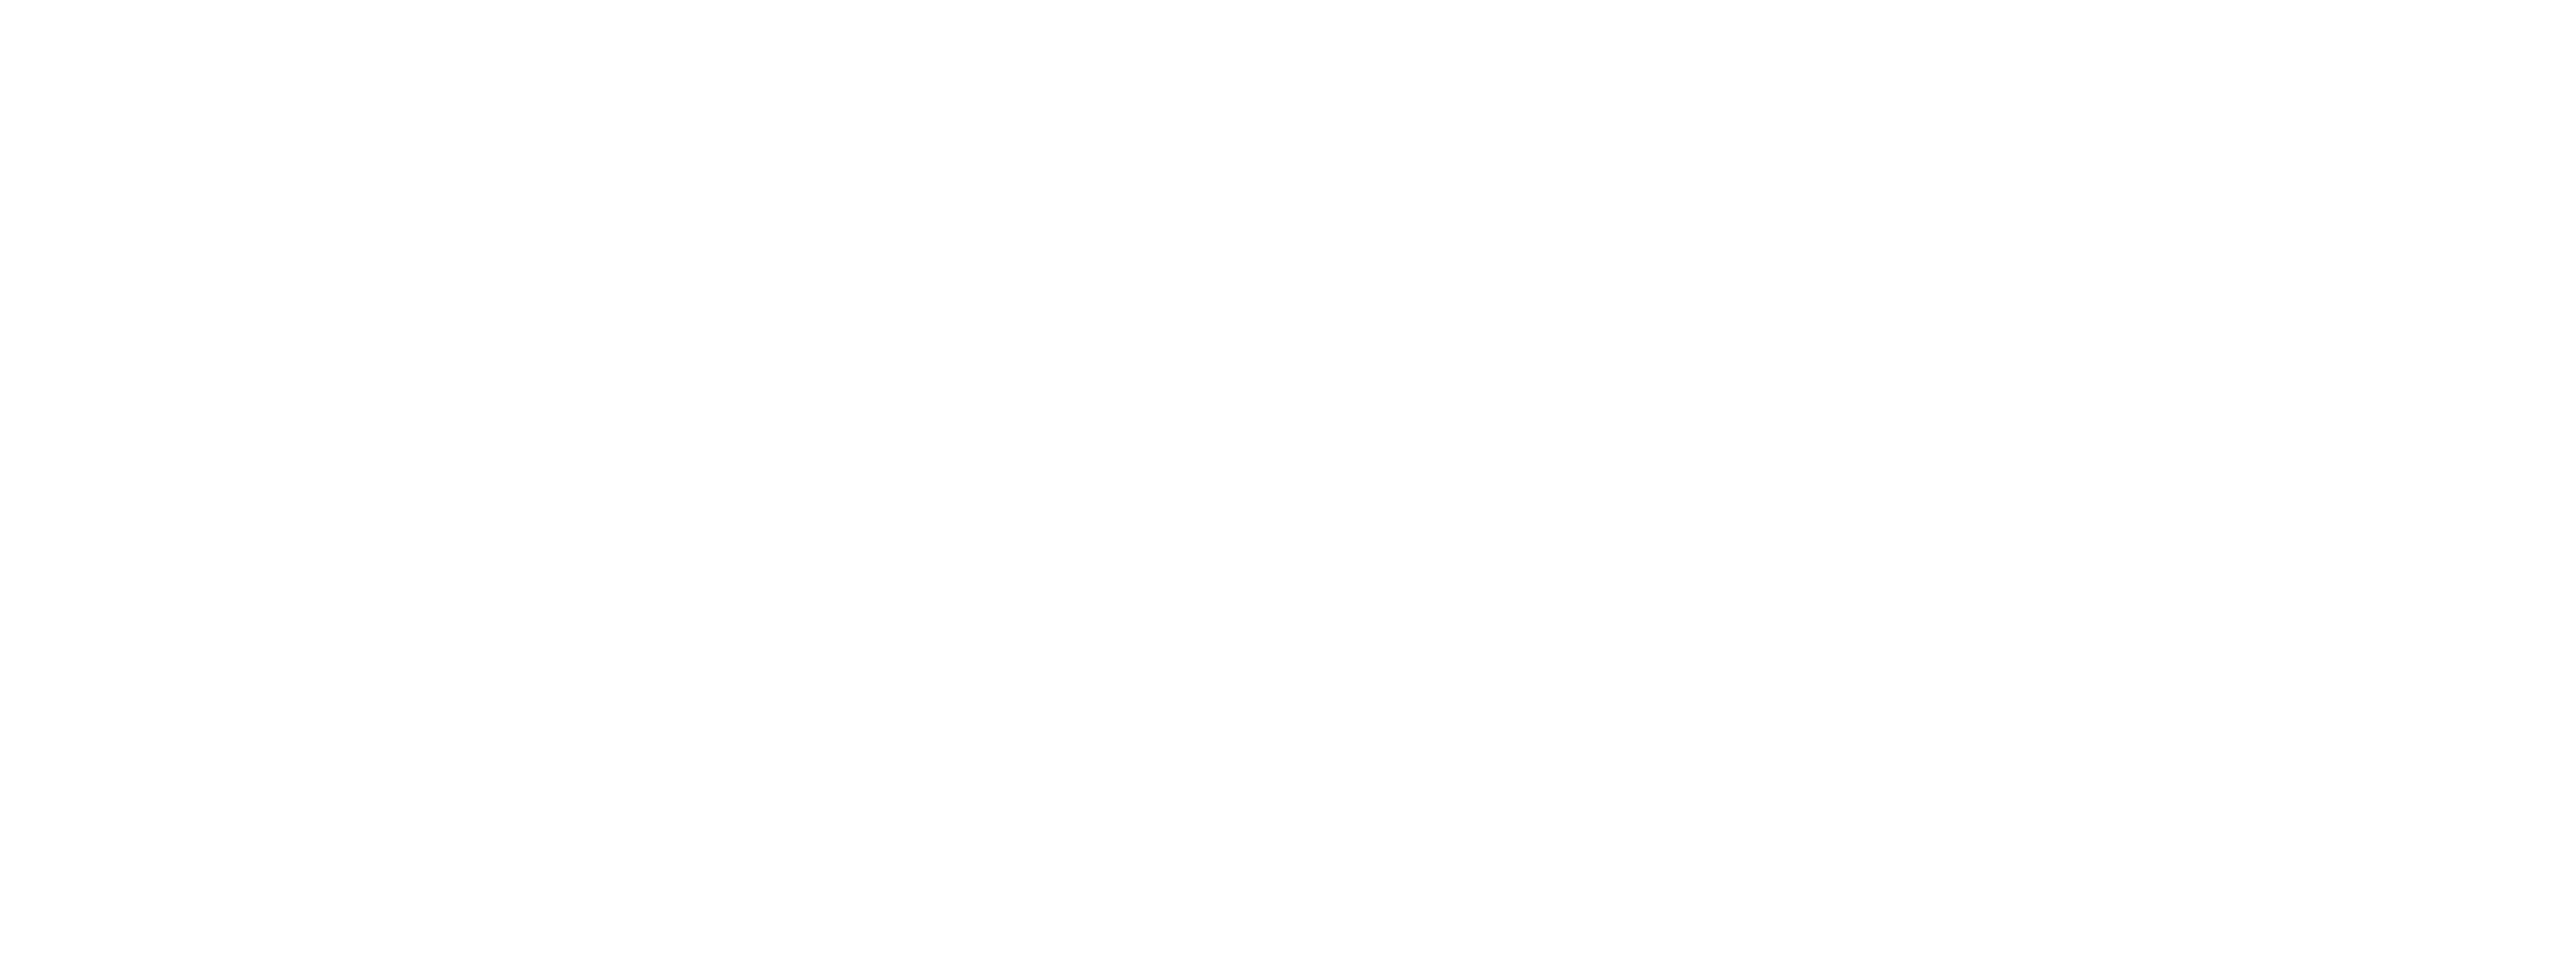

In [35]:
fig = plt.figure(figsize=(16, 6))
#import mpld3
#mpld3.enable_notebook()
%matplotlib notebook 
ax2 = fig.add_subplot(111)
x = X[:,0]
y = X[:,1]
ax2.scatter(x, y, c=None)

for i, txt in enumerate(n):
    ax2.annotate(txt, (x[i],y[i]))
    t = ax2.text(x[i], y[i], "txt", ha="center", va="center", rotation=45, size=1)

plt.show()

In [33]:
#To plot images instead of markers
def main():
    x = X_embedded[:,0]
    y = X_embedded[:,1]
    image_path = get_sample_data('ada.png')
    fig, ax = plt.subplots()
    imscatter(x, y, image_path, zoom=0.1, ax=ax)
    ax.plot(x, y)
    plt.show()

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

main()

NameError: name 'get_sample_data' is not defined

In [ ]:
#----------------------------------------------------------------------
## Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
## Computing PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))
## Computing t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()